# SLEEP DATA ANALYSIS

In [448]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
sb.set() # set the default Seaborn style for graphics

# Importing the sleep data set

In [449]:
sleepData = pd.read_csv("sleepData.csv")

## Cleaning & Encoding columns in DataSet

In [450]:
# Replace 'Normal Weight' with 'Normal' in the 'BMI Category' column
sleepData["BMI Category"] = sleepData["BMI Category"].replace("Normal Weight", "Normal")
# Extract the value before '/' symbol
sleepData['Blood Pressure'] = sleepData['Blood Pressure'].str.split('/').str[0]


# initiate Label Encoder
label_encoder = LabelEncoder()
sleepData["BMI Category"] = label_encoder.fit_transform(sleepData["BMI Category"])
# Normal: 0, Normal Weight: 1, Obese: 2, Overweight: 3

# Replace NaN with 0 and map 'Sleep Apnea' and 'Insomnia' to 1
sleepData["Sleep Disorder"] = sleepData["Sleep Disorder"].fillna(0)
sleepData["Sleep Disorder"] = sleepData["Sleep Disorder"].replace(['Sleep Apnea', 'Insomnia'], 1)
# Convert column to integer type
sleepData["Sleep Disorder"] = sleepData["Sleep Disorder"].astype(int)

sleepData.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,2,126,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,0,125,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,0,125,75,10000,0
3,4,Male,28,Sales Representative,5.9,4,30,8,1,140,85,3000,1
4,5,Male,28,Sales Representative,5.9,4,30,8,1,140,85,3000,1


In [451]:
sleepDuration = pd.DataFrame(sleepData["Sleep Duration"])
sleepQuality = pd.DataFrame(sleepData["Quality of Sleep"])
physicalActivity = pd.DataFrame(sleepData["Physical Activity Level"])
stressLevel = pd.DataFrame(sleepData["Stress Level"])
bmiCategory = pd.DataFrame(sleepData["BMI Category"])
bloodPressure = pd.DataFrame(sleepData["Blood Pressure"])
heartRate = pd.DataFrame(sleepData["Heart Rate"])
dailySteps = pd.DataFrame(sleepData["Daily Steps"])
sleepDisorder = pd.DataFrame(sleepData["Sleep Disorder"])

## Split dataset into training and test sets

In [452]:
from sklearn.model_selection import train_test_split, cross_val_score

# Combine variables into a single DataFrame
X = pd.concat([sleepDuration, sleepQuality, physicalActivity, stressLevel, bmiCategory, 
               bloodPressure, heartRate, dailySteps], axis=1)
y = sleepDisorder.values.ravel()  # Flatten sleepDisorder into a 1D array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Scale predictor variables

In [453]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Function to display ROC curve for data

In [454]:
from sklearn.metrics import roc_curve, auc

def getRocCurve(y_test, y_pred):
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Compute Area Under the ROC Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    ## more right angle the top, better the model

## Function to display confusion matrix

In [455]:
from sklearn.metrics import confusion_matrix


def displayConfusionMatrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Use logistic Regression Model
## Base case model (most simple)

### We use recursive feature selection to select the most important features and then fit the logistic regression model with those features

In [456]:
from sklearn.linear_model import LogisticRegression
    
def logisticRegression(X_train, X_test, y_train):
    # Initialize logistic regression model
    log_reg_model = LogisticRegression()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    
    # Fit the logistic regression model to your training data with selected features
    log_reg_model.fit(X_train_scaled, y_train)

    # Predict data
    y_pred_log = log_reg_model.predict(X_test_scaled)

    return y_pred_log

Accuracy: 0.89
Precision: 0.91
Recall: 0.85
F1 Score: 0.88


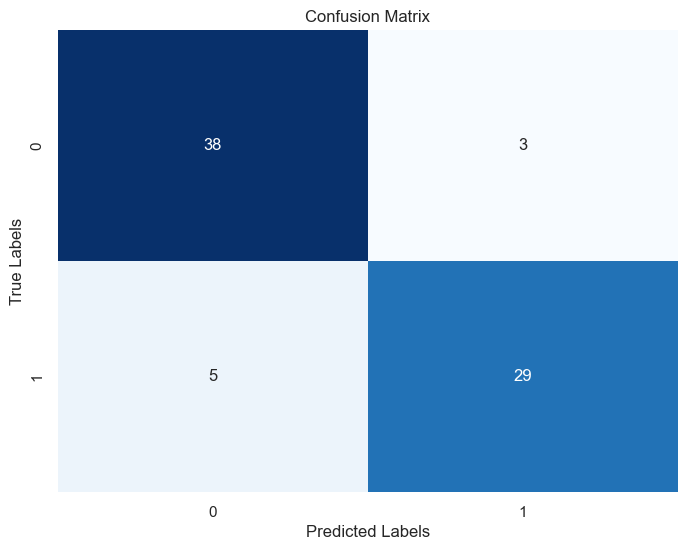

In [457]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictors = ["Quality of Sleep", "Sleep Duration", "BMI Category"]

y_pred = logisticRegression(X_train[predictors], X_test[predictors], y_train)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plotting the confusion matrix
displayConfusionMatrix(y_test, y_pred)


## Demonstrate the Logistic Regression model's performance by assessing its ROC AUC (Receiver Operating Characteristic Area Under the Curve).

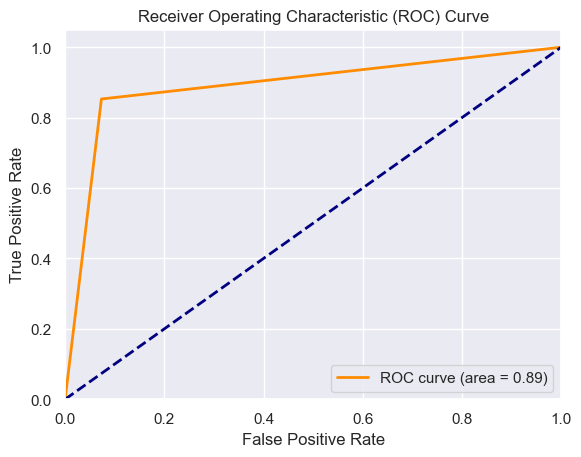

In [458]:
getRocCurve(y_test, y_pred)

# Using Random Forest Model
## Checking which features are more important
Feature Importance: If you're using tree-based models like Random Forest, you can use the built-in feature importance attribute to identify the most important features. Features with higher feature importance scores are considered more relevant for predicting the target variable.

                   Feature  Importance
4             BMI Category    0.330739
5           Blood Pressure    0.260930
0           Sleep Duration    0.145958
6               Heart Rate    0.069203
3             Stress Level    0.068871
7              Daily Steps    0.046338
1         Quality of Sleep    0.039443
2  Physical Activity Level    0.038518


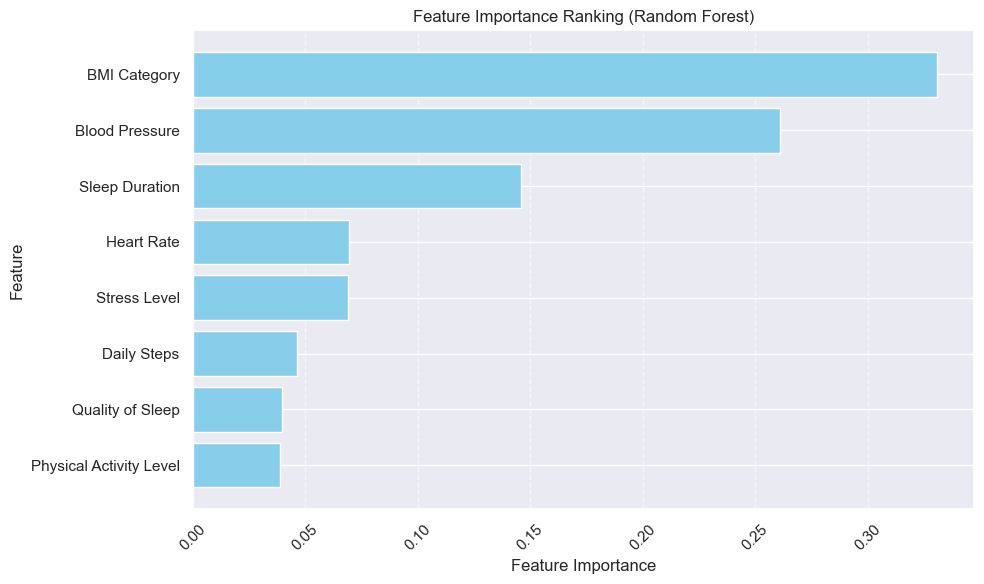

In [459]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Get feature names and importances from the DataFrame 
features = feature_importance_df['Feature'].to_numpy()
importances = feature_importance_df['Importance'].to_numpy()


# Create a bar chart with this data
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired
plt.barh(features, importances, color='skyblue')  # Bar plot with horizontal bars
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Ranking (Random Forest)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top

# Display grid lines and labels
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

### From analysing the feature importance, it can be shown that Blood Pressure, BMI Category and Sleep Duration are the variables that affect the likelihood of having sleeping disorder the most.

## Use all Features for this Model

In [460]:
# Evaluate the model that used all features using cross-validation
random_forest_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5)
print("------------------------------------------- Using all features -------------------------------------------")
# Check model performance
print("Random Forest Cross-Validation Scores:", random_forest_scores)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test_scaled)

# Evaluate the models on the test data
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nUsing all features")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

------------------------------------------- Using all features -------------------------------------------
Random Forest Cross-Validation Scores: [0.91666667 0.86666667 0.98333333 0.94915254 0.94915254]

Using all features
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.97      0.94      0.96        34

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [461]:
# Function for random tree model

def random_forest_train_evaluate(X_train_scaled, X_test_scaled, y_train, y_test):
    # Initialize model
    random_forest = RandomForestClassifier()

    # Train the model
    random_forest.fit(X_train_scaled, y_train)

    # Evaluate the model that used all features using cross-validation
    random_forest_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5)

    # Check model performance
    print("Random Forest Cross-Validation Scores:", random_forest_scores)

    # Make predictions on the testing data
    y_pred = random_forest.predict(X_test_scaled)

    # Evaluate the models on the test data
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    return y_pred


## Using Sleep duration, BMI Category and Quality of Sleep to predict SleepDisorder


--------------------------- Using Sleep Duration, BMI Category, Quality Of Sleep ---------------------------
Random Forest Cross-Validation Scores: [0.93333333 0.83333333 0.93333333 0.94915254 0.89830508]
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.91      0.94      0.93        34

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



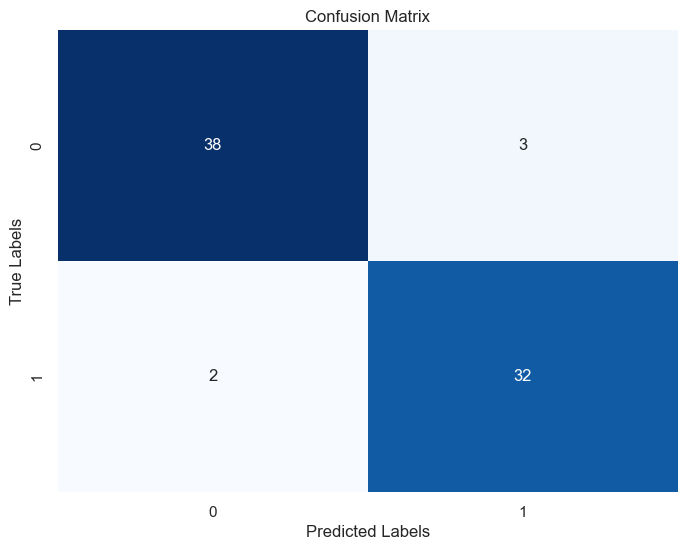

In [462]:
# Filter X_train and X_test 
X_train_selected = X_train[["Sleep Duration","BMI Category","Quality of Sleep"]]
X_test_selected = X_test[["Sleep Duration","BMI Category","Quality of Sleep"]]

# # Scale the data
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

print("--------------------------- Using Sleep Duration, BMI Category, Quality Of Sleep ---------------------------")

# Put data into function
y_pred = random_forest_train_evaluate(X_train_selected_scaled, X_test_selected_scaled, y_train, y_test)
displayConfusionMatrix(y_test, y_pred)

## Demonstrate the Random Forest model's performance by assessing its ROC AUC (Receiver Operating Characteristic Area Under the Curve).

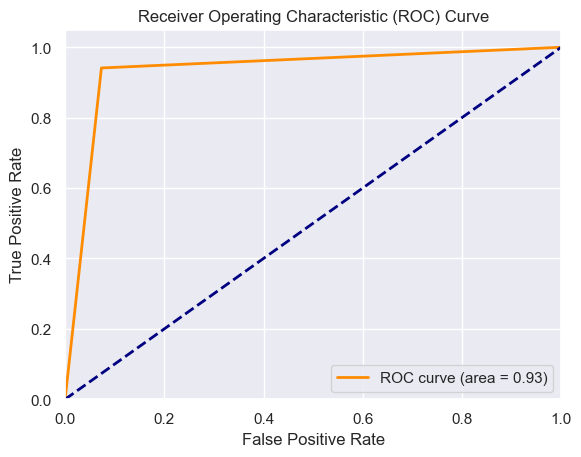

In [463]:
getRocCurve(y_test, y_pred)

# Gradient Boosting

BMI Category: 0.801645047732771
Blood Pressure: 0.12136017453571067
Daily Steps: 0.028267233371648465
Sleep Duration: 0.023268009812653617
Heart Rate: 0.01726036057134761
Quality of Sleep: 0.007533968917451177
Physical Activity Level: 0.0004828531023144832
Stress Level: 0.0001823519561029483


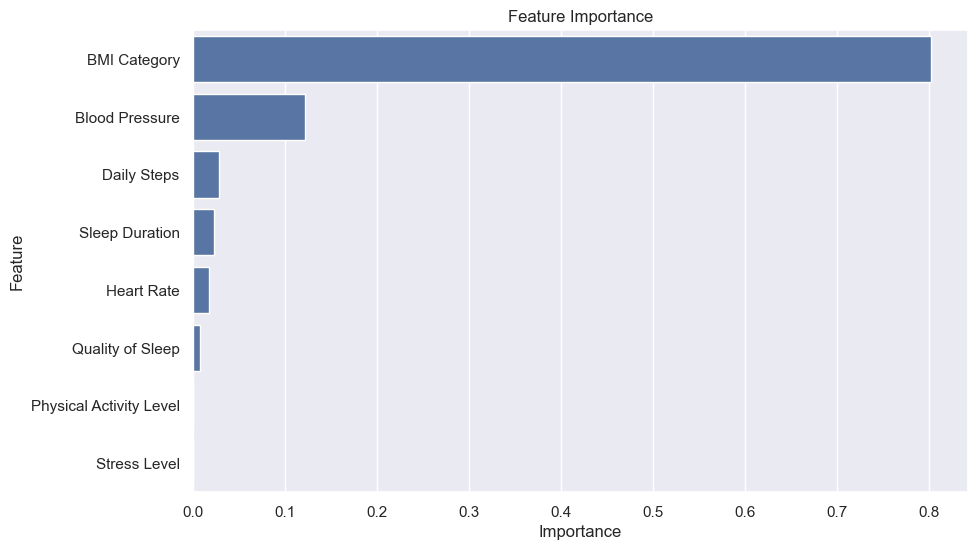

In [464]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Fit the model to your training data
gb_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = gb_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Print feature names and their importances
for idx in sorted_indices:
    print(f"{X_train.columns[idx]}: {feature_importances[idx]}")

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## From gradient boosting, the most important feature by far is BMI Catergory

In [465]:
def gradientBoosting(X_train_scaled, X_test_scaled, y_train, y_test):
    # Assuming X_train, X_test, y_train, y_test are your train-test split data
    # Initialize Gradient Boosting Classifier
    gb_model = GradientBoostingClassifier()
    
    # Fit the model to your training data
    gb_model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test data
    y_pred = gb_model.predict(X_test_scaled)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification report: ", report)
    return y_pred

## Using Sleep Quality, Sleep Duration and BMI Category for gradient boosting

Gradient Boosting accuracy using Sleep Quality, Sleep Duration, BMI Category
Accuracy: 0.9333333333333333
Classification report:                precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.91      0.94      0.93        34

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



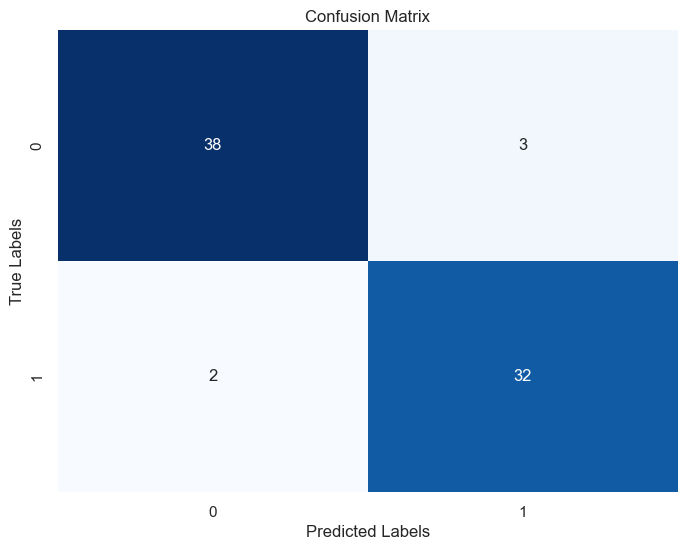

In [466]:
print("Gradient Boosting accuracy using Sleep Quality, Sleep Duration, BMI Category")
y_pred = gradientBoosting(X_train_selected_scaled, X_test_selected_scaled, y_train, y_test)
displayConfusionMatrix(y_test, y_pred)


## Demonstrate the Gradient Boosting model's performance by assessing its ROC AUC (Receiver Operating Characteristic Area Under the Curve).

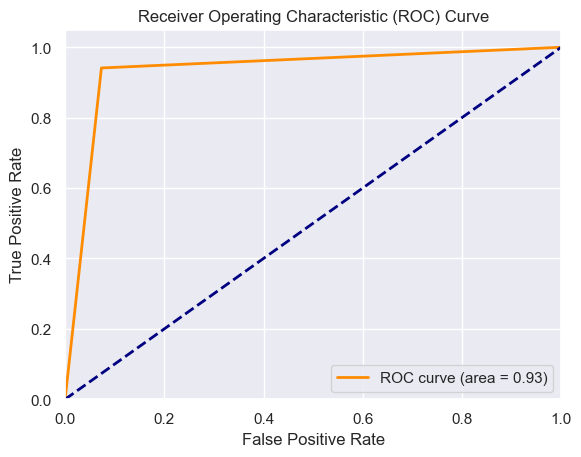

In [467]:
getRocCurve(y_test, y_pred)

# Checking variables that affect stress level

## Split the data into test and training sets

In [468]:
# Combine variables into a single DataFrame
X = pd.concat([sleepDuration, sleepQuality, physicalActivity, sleepDisorder, bmiCategory, 
               bloodPressure, heartRate, dailySteps], axis=1)

y = stressLevel.values.ravel()  # Flatten sleepDisorder into a 1D array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale training and test sets

In [469]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logisitic Regression using Quality of Sleep, Sleep Duration, Physical Activity Level

Accuracy: 0.72
Precision: 0.81
Recall: 0.72
F1 Score: 0.71


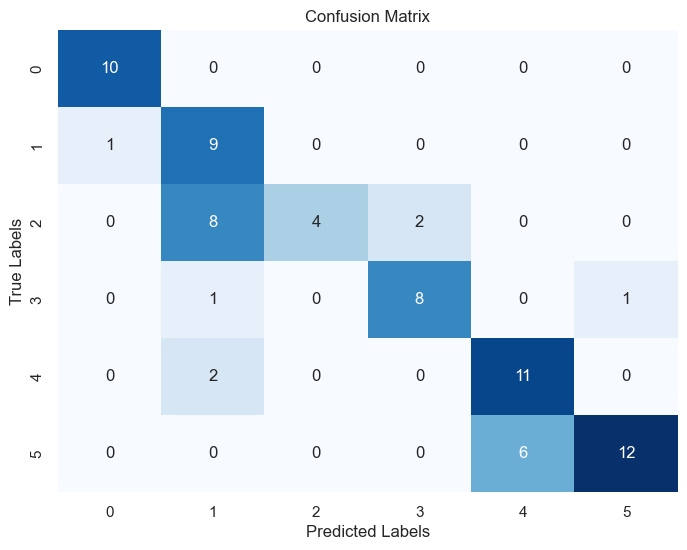

In [470]:
predictors = ["Quality of Sleep", "Sleep Duration", "Physical Activity Level"]

y_pred = logisticRegression(X_train[predictors], X_test[predictors], y_train)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

displayConfusionMatrix(y_test, y_pred)


# Using Random Forest Model

## Checking Features Importance

                   Feature  Importance
0           Sleep Duration    0.220271
1         Quality of Sleep    0.203006
6               Heart Rate    0.141454
2  Physical Activity Level    0.137233
5           Blood Pressure    0.131923
7              Daily Steps    0.123531
4             BMI Category    0.021541
3           Sleep Disorder    0.021042


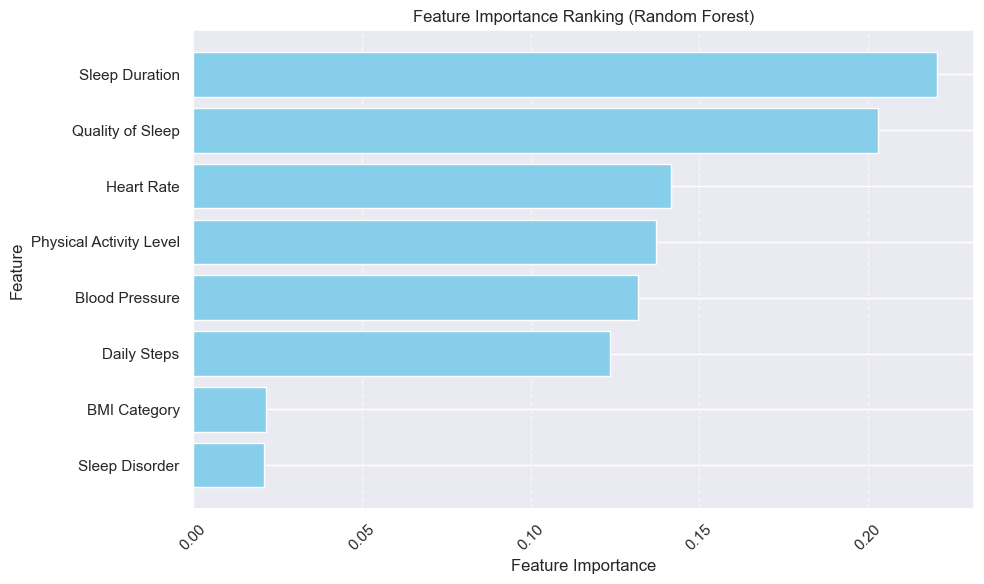

In [471]:
# Initialize model
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Get feature names and importances from the DataFrame 
features = feature_importance_df['Feature'].to_numpy()
importances = feature_importance_df['Importance'].to_numpy()


# Create a bar chart with this data
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired
plt.barh(features, importances, color='skyblue')  # Bar plot with horizontal bars
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Ranking (Random Forest)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top

# Display grid lines and labels
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

## Using all Features for this Model

------------------------------------------- Using all features -------------------------------------------
Random Forest Cross-Validation Scores: [0.95       0.91666667 0.98333333 0.94915254 0.96610169]

Using all features
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        18

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



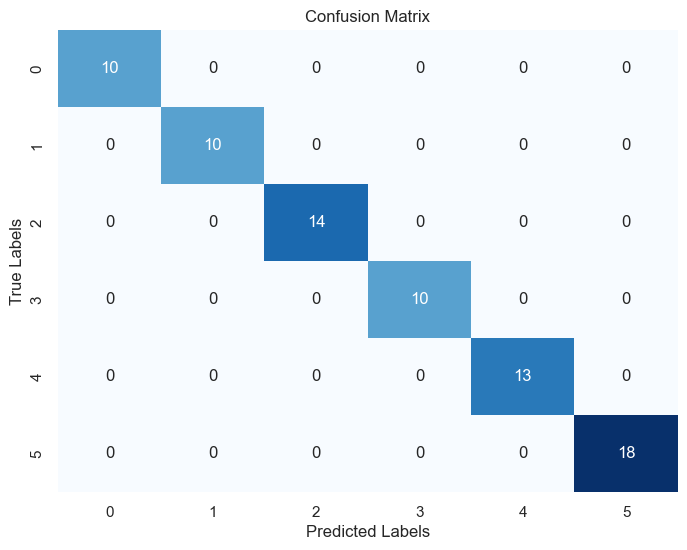

In [472]:
# Evaluate the model that used all features using cross-validation
random_forest_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5)
print("------------------------------------------- Using all features -------------------------------------------")
# Check model performance
print("Random Forest Cross-Validation Scores:", random_forest_scores)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test_scaled)

# Evaluate the models on the test data
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nUsing all features")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

displayConfusionMatrix(y_test, y_pred)

## Using Sleep duration, physical health and quality of sleep to predict Stress Level


--------------------------- Using Sleep Duration, Physical Activity, Quality Of Sleep ---------------------------
Random Forest Cross-Validation Scores: [0.88333333 0.9        0.88333333 0.86440678 0.84745763]
Accuracy: 0.9066666666666666
Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       0.60      0.90      0.72        10
           5       0.91      0.71      0.80        14
           6       1.00      1.00      1.00        10
           7       1.00      0.85      0.92        13
           8       1.00      1.00      1.00        18

    accuracy                           0.91        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.93      0.91      0.91        75



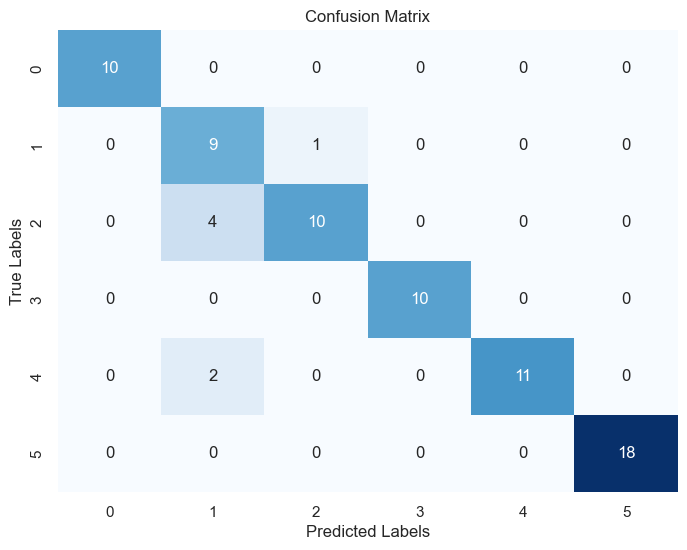

In [473]:
# Filter X_train and X_test 
X_train_selected = X_train[["Sleep Duration","Physical Activity Level","Quality of Sleep"]]
X_test_selected = X_test[["Sleep Duration","Physical Activity Level","Quality of Sleep"]]

# # Scale the data
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

print("--------------------------- Using Sleep Duration, Physical Activity, Quality Of Sleep ---------------------------")

# Put data into function
y_pred  = random_forest_train_evaluate(X_train_selected_scaled, X_test_selected_scaled, y_train, y_test)
displayConfusionMatrix(y_test, y_pred)


# Gradient Boosting

Sleep Duration: 0.3254652086685249
Quality of Sleep: 0.25546994799282163
Blood Pressure: 0.13191474801481431
Heart Rate: 0.11378124466328121
Physical Activity Level: 0.10910205006634073
Daily Steps: 0.060709397383161584
BMI Category: 0.0026458646200306166
Sleep Disorder: 0.0009115385910250279


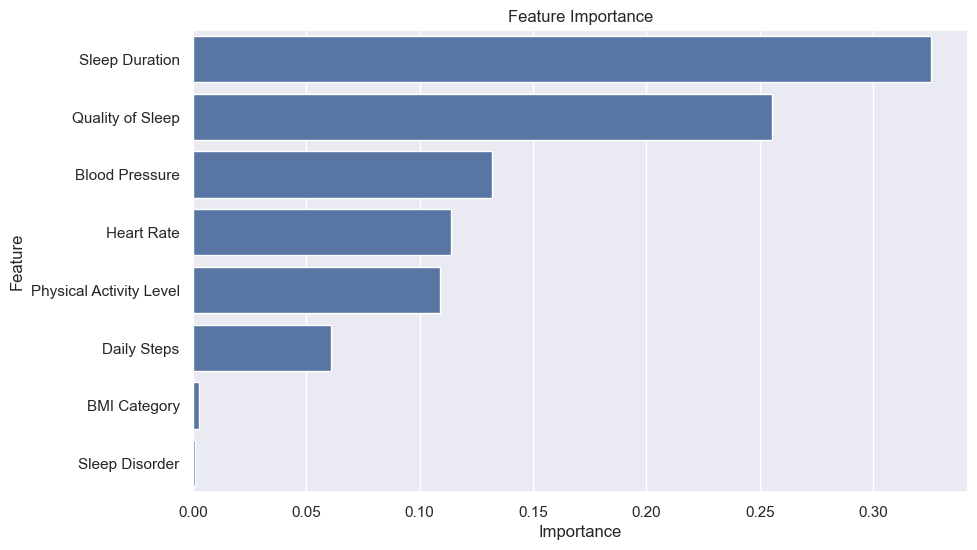

In [474]:
# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Fit the model to your training data
gb_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = gb_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Print feature names and their importances
for idx in sorted_indices:
    print(f"{X_train.columns[idx]}: {feature_importances[idx]}")

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## Using Sleep Quality, Sleep Duration and Physical Activity Level for Gradient Boosting 

Gradient Boosting accuracy using Sleep Quality, Sleep Duration, Physical Activity Level
Accuracy: 0.9066666666666666
Classification report:                precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       0.60      0.90      0.72        10
           5       0.91      0.71      0.80        14
           6       1.00      1.00      1.00        10
           7       1.00      0.85      0.92        13
           8       1.00      1.00      1.00        18

    accuracy                           0.91        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.93      0.91      0.91        75



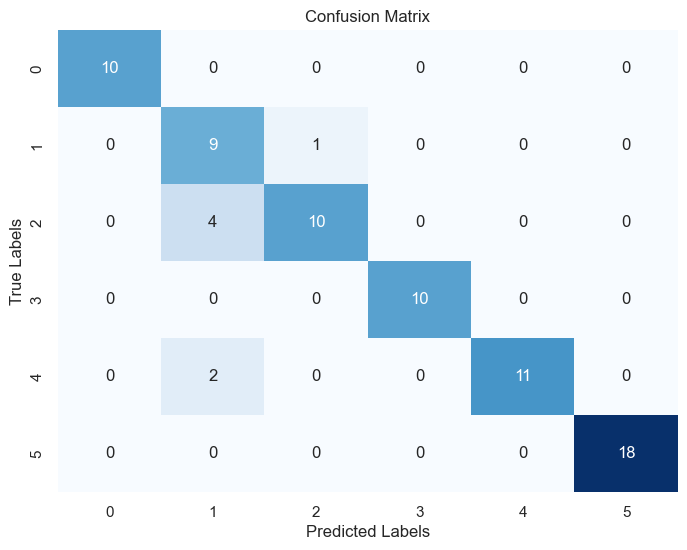

In [475]:
print("Gradient Boosting accuracy using Sleep Quality, Sleep Duration, Physical Activity Level")
gradientBoosting(X_train_selected_scaled, X_test_selected_scaled, y_train, y_test)
displayConfusionMatrix(y_test, y_pred)

### Function for linear regression returning predictions

In [476]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def LinearRegress(X_train, X_test, y_train): 
    # Fit the linear regression model on the training data
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(X_train, y_train)
    
    # Make predictions on the training and testing data
    y_train_pred = linear_reg_model.predict(X_train)
    y_test_pred = linear_reg_model.predict(X_test)
    return [y_train_pred, y_test_pred]

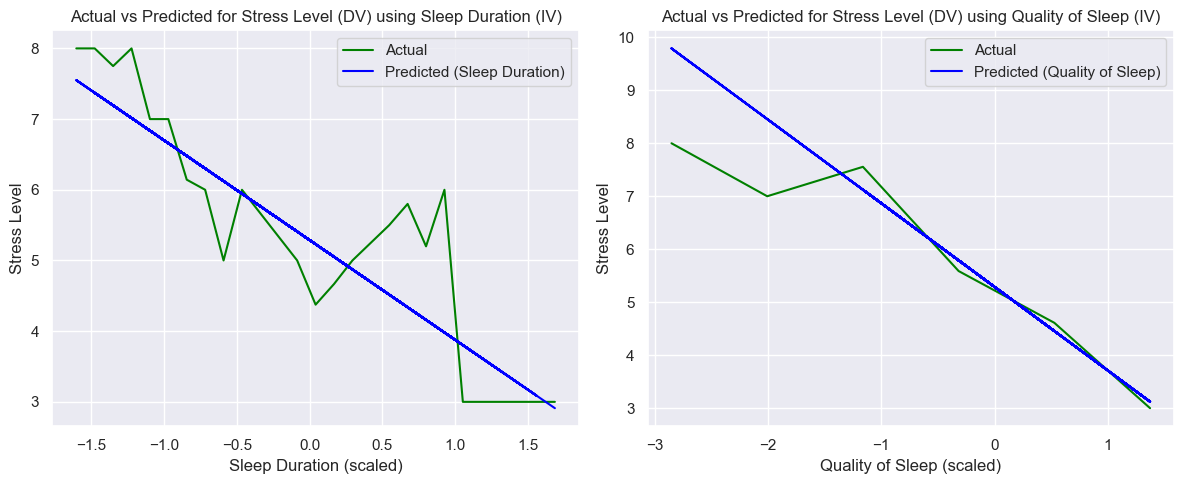

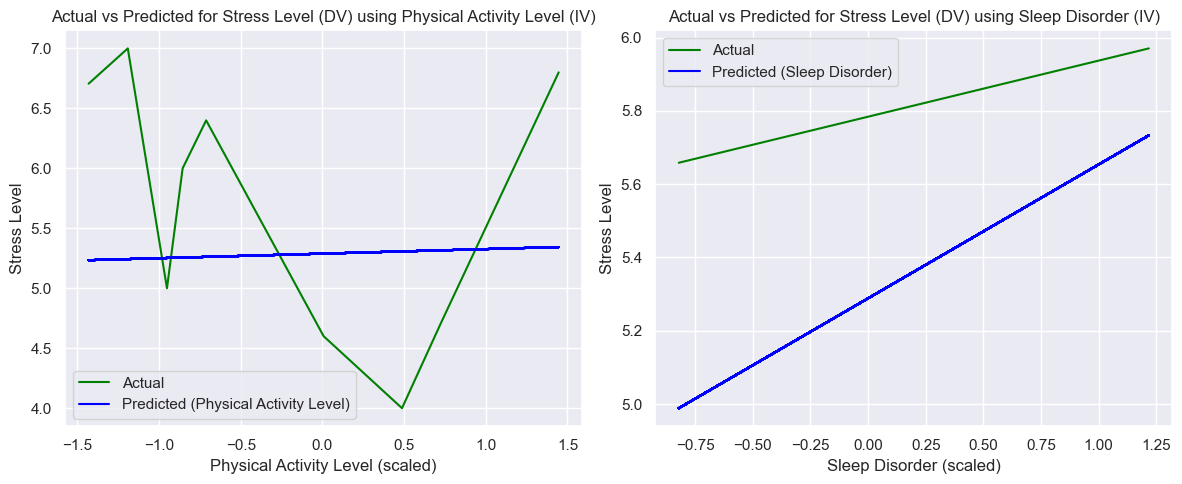

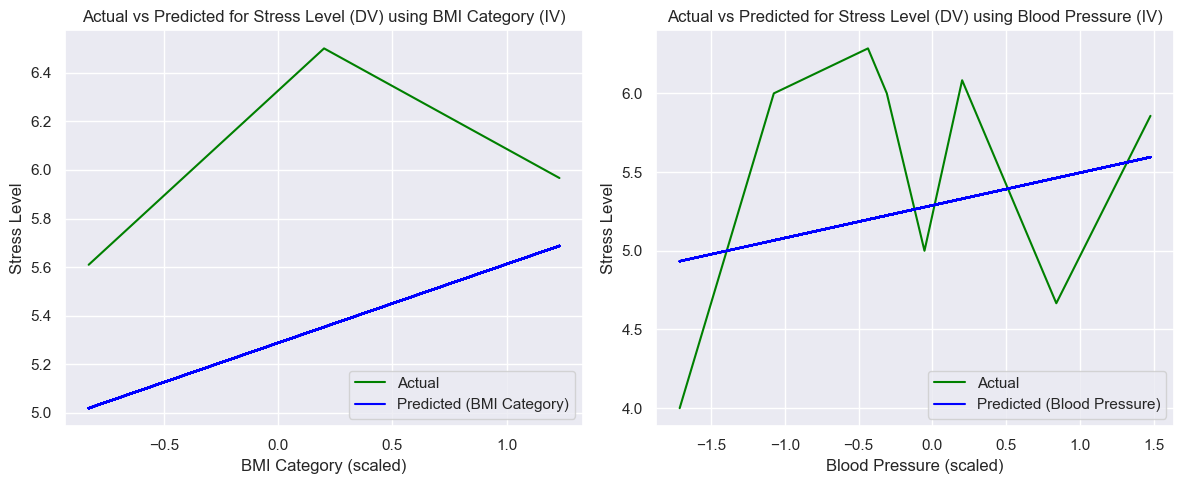

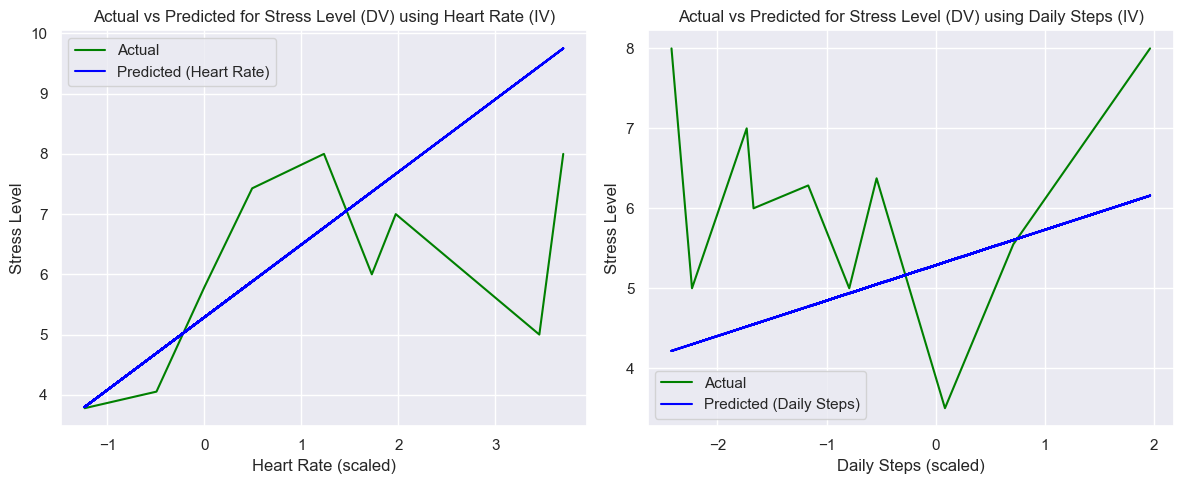

In [477]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Initialize the list of independent variables (IVs)
IVs = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Sleep Disorder', 
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps']

def return_mean_y(y_test, X_test_iv_scaled):
    unique_X_test = np.unique(X_test_iv_scaled)
    mean_y_test = []
    for val in unique_X_test:
        indices = np.where(X_test_iv_scaled == val)[0]
        mean_pred = np.mean(y_test[indices])
        mean_y_test.append(mean_pred)
    return unique_X_test, np.array(mean_y_test)



# Initialize lists to store RMSE values for each IV
rmse_test = []

# Initialize lists to store R^2 values for each model
r_square_values = []

# Initialize dictionary to store predictions for each IV
y_test_dict = {}

# Calculate number of rows needed
num_IVs = len(IVs)
num_cols = 2  # Maximum of 2 graphs per row
num_rows = (num_IVs + num_cols - 1) // num_cols

# Loop through each independent variable
for i, iv in enumerate(IVs):
    # Select the current IV from the DataFrame
    X_train_iv = X_train[[iv]]
    X_test_iv = X_test[[iv]]
    
    # Scale the train and test sets
    scaler = StandardScaler()
    X_train_iv_scaled = scaler.fit_transform(X_train_iv)
    X_test_iv_scaled = scaler.transform(X_test_iv)
    
    # Initialize and fit the linear regression model
    results = LinearRegress(X_train_iv_scaled, X_test_iv_scaled, y_train)
    
    # Make predictions on the testing data
    y_test_pred = results[1]
    
    # Calculate mean predicted value for each unique X_test value
    unique_X_test, mean_y_test = return_mean_y(y_test, X_test_iv_scaled)

    # Store mean predicted values for current IV
    y_test_dict[iv] = mean_y_test
    
    # Calculate RMSE for testing set
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    # Calculate R^2 value
    r_squared = r2_score(y_test, y_test_pred)
    r_square_values.append(r_squared)
    
    # Create subplot
    if i % num_cols == 0:
        fig, axs = plt.subplots(1, num_cols, figsize=(12, 5))
    
    # Plot actual values
    axs[i % num_cols].plot(unique_X_test, mean_y_test, label='Actual', color='green')
    
    # Plot mean predicted values
    axs[i % num_cols].plot(X_test_iv_scaled, y_test_pred, label=f'Predicted ({iv})', color='blue')

    axs[i % num_cols].set_xlabel(f'{iv} (scaled)')
    axs[i % num_cols].set_ylabel('Stress Level')
    axs[i % num_cols].set_title(f'Actual vs Predicted for Stress Level (DV) using {iv} (IV)')
    axs[i % num_cols].legend()
    axs[i % num_cols].grid(True)
    
    # Show plot if it's the last subplot or the last IV
    if (i % num_cols == num_cols - 1) or (i == num_IVs - 1):
        plt.tight_layout()
        plt.show()

In [478]:
# Display RMSE, R-squared, and Adjusted R-squared
for i, iv in enumerate(IVs):
    print(f'Model for Stress Level (DV) vs {iv} (IV)')
    print("============================================================")
    print(f"RMSE: {rmse_test[i]:.3f}")
    print(f"R^2: {r_square_values[i]:.3f}")
    
    # Calculate adjusted R^2
    n = len(y_test)
    p = X_train[[iv]].shape[1]  # Number of predictors
    adj_r_squared = 1 - ((1 - r_square_values[i]) * (n - 1) / (n - p - 1))
    print(f"Adjusted R^2: {adj_r_squared:.3f}")
    
    print("\n============================================================\n")


Model for Stress Level (DV) vs Sleep Duration (IV)
RMSE: 0.962
R^2: 0.693
Adjusted R^2: 0.689


Model for Stress Level (DV) vs Quality of Sleep (IV)
RMSE: 0.748
R^2: 0.815
Adjusted R^2: 0.812


Model for Stress Level (DV) vs Physical Activity Level (IV)
RMSE: 1.819
R^2: -0.099
Adjusted R^2: -0.114


Model for Stress Level (DV) vs Sleep Disorder (IV)
RMSE: 1.806
R^2: -0.082
Adjusted R^2: -0.097


Model for Stress Level (DV) vs BMI Category (IV)
RMSE: 1.802
R^2: -0.078
Adjusted R^2: -0.093


Model for Stress Level (DV) vs Blood Pressure (IV)
RMSE: 1.805
R^2: -0.082
Adjusted R^2: -0.096


Model for Stress Level (DV) vs Heart Rate (IV)
RMSE: 1.427
R^2: 0.325
Adjusted R^2: 0.315


Model for Stress Level (DV) vs Daily Steps (IV)
RMSE: 1.894
R^2: -0.191
Adjusted R^2: -0.207




## Function for OLS regression model

In [479]:
import statsmodels.api as sm

# Function for Linear regression using statsmodel.api.OLS
def OLSregression(X_train, X_test, y_train, y_test):
    # Selected features
    selectedIVs = X_train.columns.tolist()
    print(selectedIVs)
    
    # Scale Data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # We use statsmodel.api.OLS as it provies detailed summary statistics including coefficient estimate, standard erros, etc
    X_train_const = sm.add_constant(X_train_scaled)
    model = sm.OLS(y_train, X_train_const)
    results = model.fit()
    
    # Print summary of regression results
    print(results.summary())

    # Assess model performance
    print("Correlation Coefficient:", np.sqrt(results.rsquared))
    print("R-squared\t:", results.rsquared)
    print("Adjusted R-squared:", results.rsquared_adj)
    print("F-statistic\t:", results.fvalue)
    print("\n========================== p-values for coefficients ==========================\n")
    # print(results.pvalues)
    for i in range(len(selectedIVs)):
        print(f"{selectedIVs[i]} \t: {results.pvalues[i]}")

    # Make predictions on test set
    X_test_const = sm.add_constant(X_test_scaled)
    y_pred = results.predict(X_test_const)

    # Compare predicted data with y_test data
    comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
   # Calculate the differences between actual and predicted values
    differences = y_test - y_pred
    
    # Plot the differences
    plt.figure(figsize=(10, 6))
    plt.plot(differences, color='green', linestyle='-', marker='o')
    plt.axhline(y=0, color='black', linestyle='--')  # Add horizontal line at y=0 for reference
    plt.xlabel('Index')
    plt.ylabel('Difference')
    plt.title('Differences between Actual and Predicted Values')
    plt.grid(True)
    plt.show()


    
    # Assess model performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", rmse)

### Check for the accuracy of model using all variables

['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Sleep Disorder', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     301.3
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          2.29e-135
Time:                        23:59:07   Log-Likelihood:                -259.06
No. Observations:                 298   AIC:                             536.1
Df Residuals:                     289   BIC:                             569.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

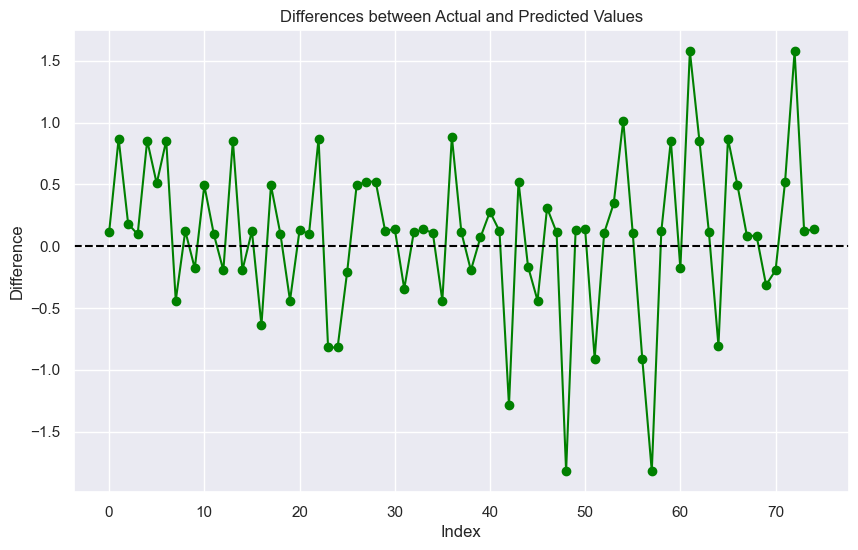

Root Mean Squared Error (RMSE): 0.6253699176319103


In [480]:
OLSregression(X_train, X_test, y_train, y_test)

## Fit the model using variables with p-values < 0.01 which are
## Sleep Duration, Physical Activity Level, Sleep Disorder, Blood Pressure, Heart Rate, and Daily Steps 

['Sleep Duration', 'Physical Activity Level', 'Sleep Disorder', 'Blood Pressure', 'Heart Rate', 'Daily Steps']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     209.7
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          1.58e-102
Time:                        23:59:07   Log-Likelihood:                -342.83
No. Observations:                 298   AIC:                             699.7
Df Residuals:                     291   BIC:                             725.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

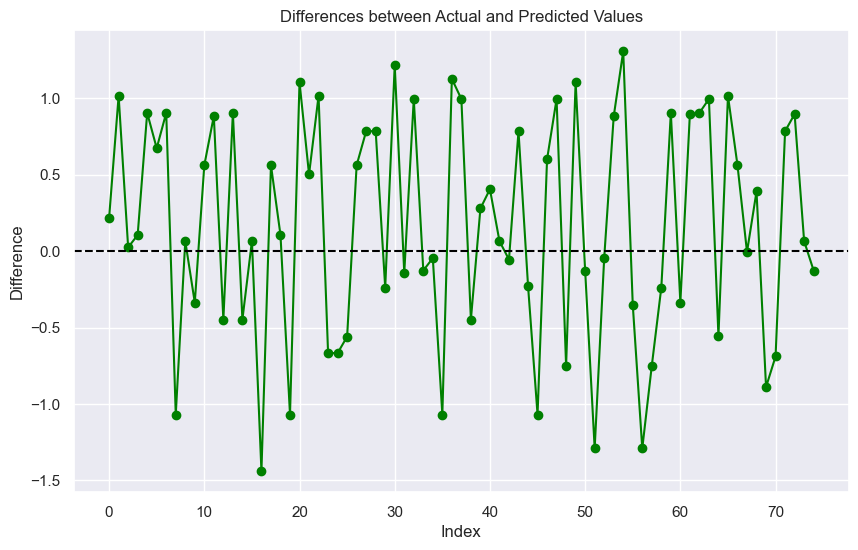

Root Mean Squared Error (RMSE): 0.744268318569122


In [481]:
selectedFeatures = ['Sleep Duration','Physical Activity Level', 'Sleep Disorder', 'Blood Pressure', 'Heart Rate', 'Daily Steps']
X_train_selectedFeatures = X_train[selectedFeatures]
X_test_selectedFeatures = X_test[selectedFeatures]
OLSregression(X_train_selectedFeatures, X_test_selectedFeatures, y_train, y_test)

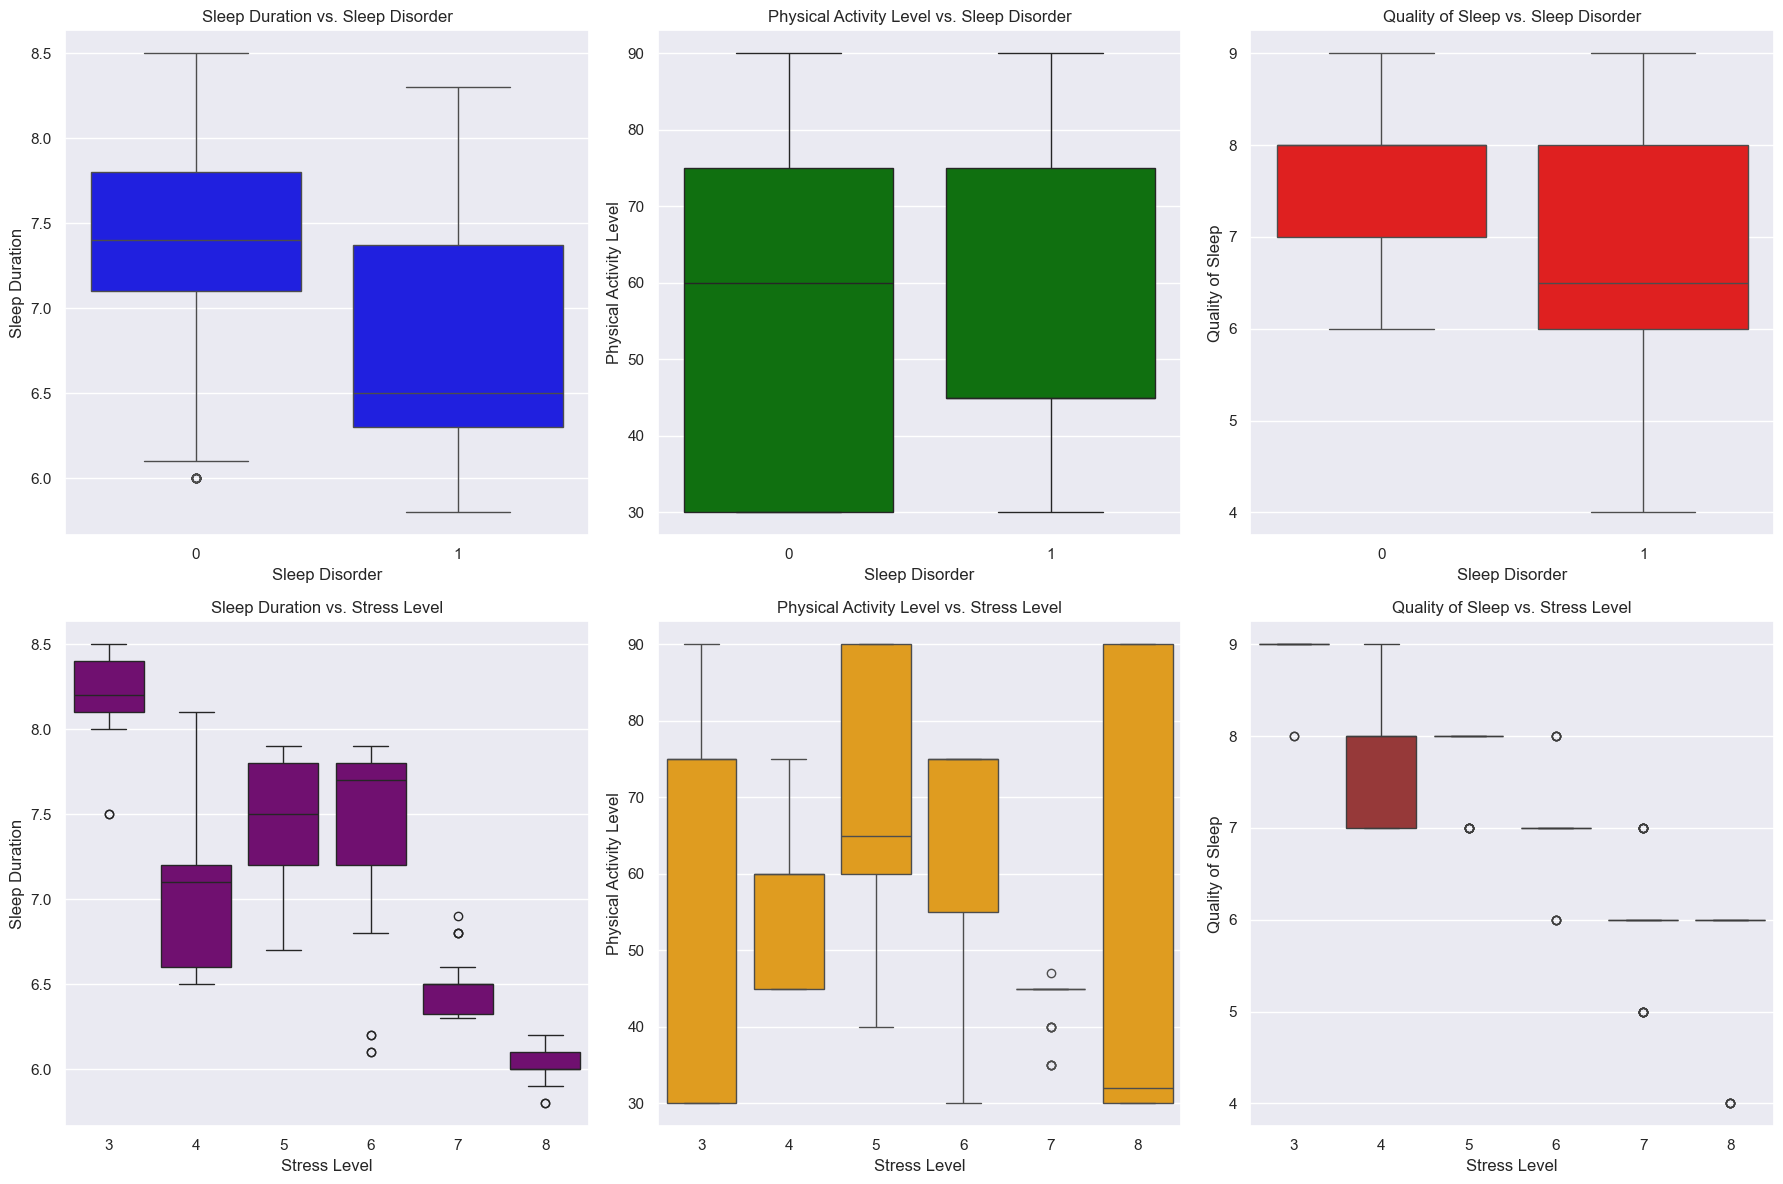

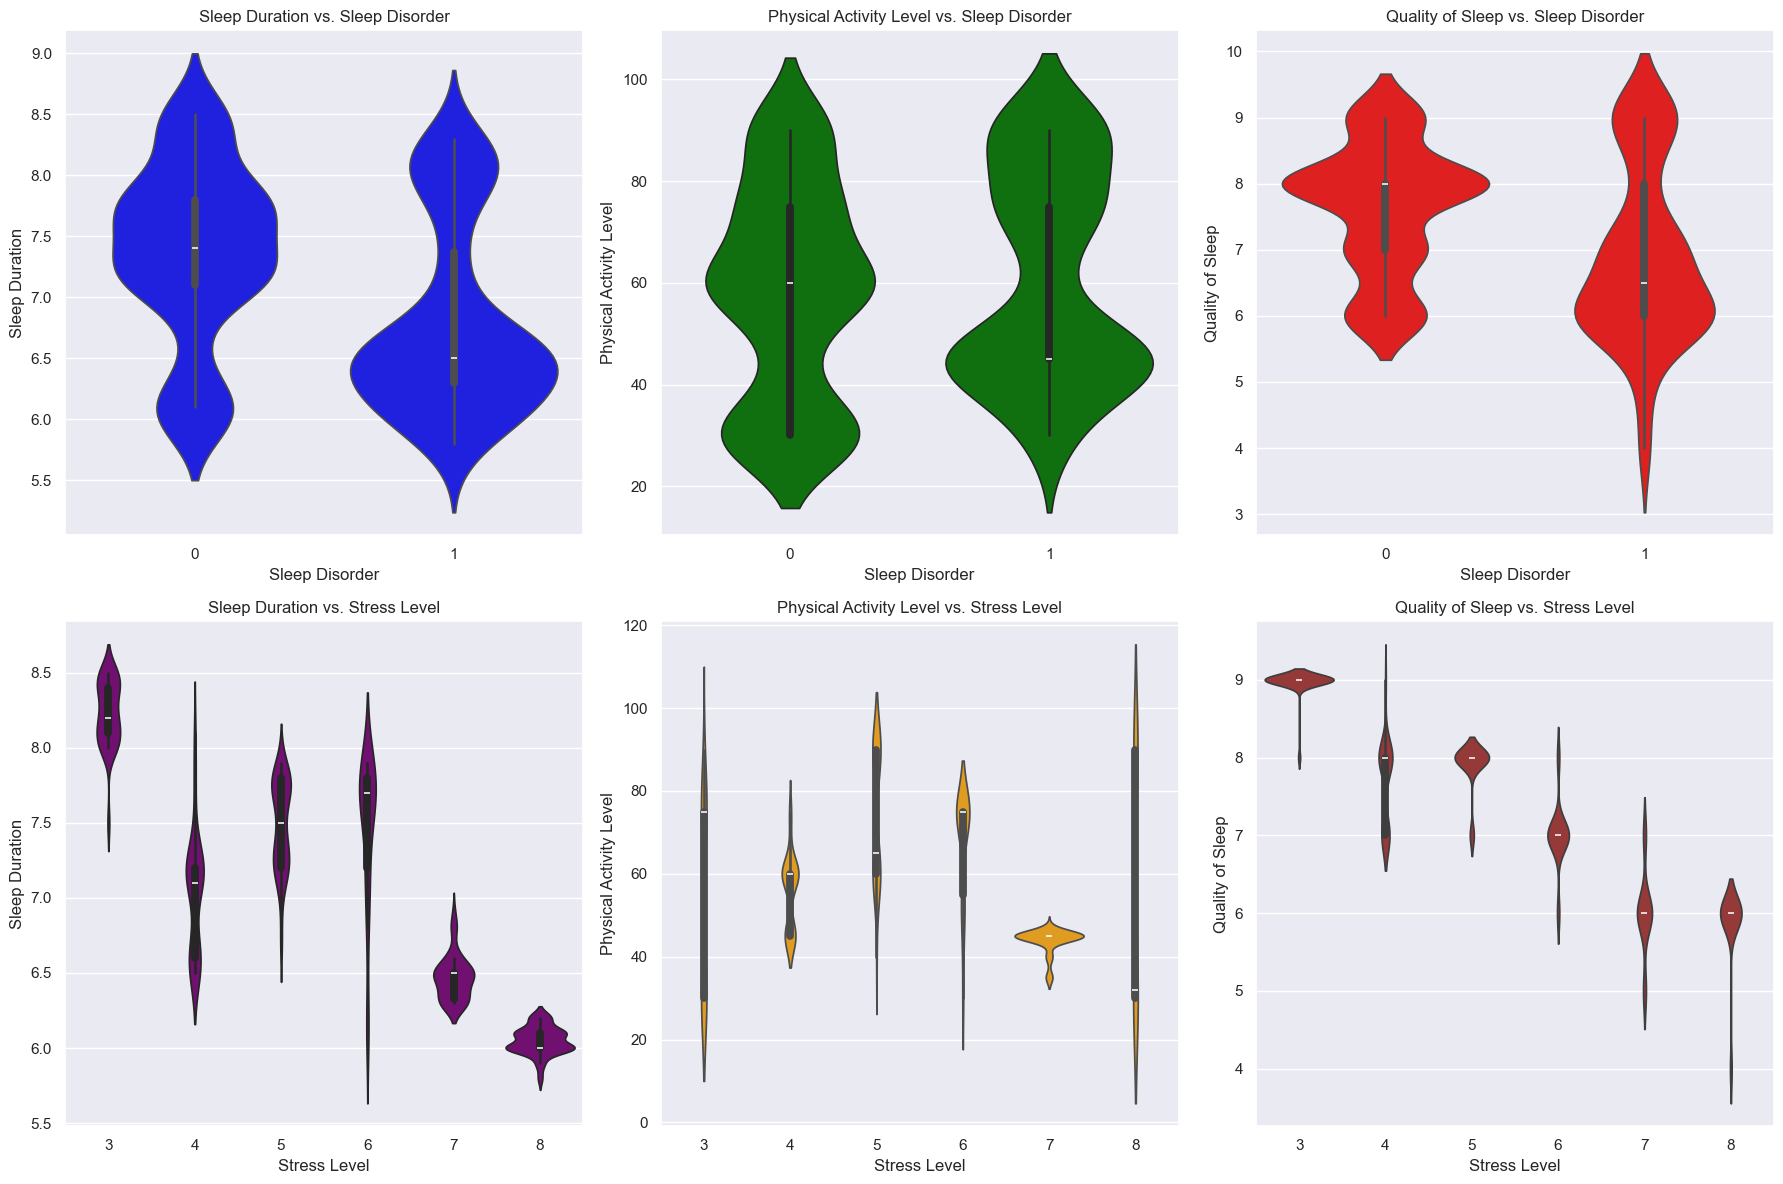

In [482]:
# Initial plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting graphs related to sleep
sb.boxplot(data=sleepData, y="Sleep Duration", x="Sleep Disorder", ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Sleep Duration vs. Sleep Disorder")

sb.boxplot(data=sleepData, y="Physical Activity Level", x="Sleep Disorder", ax=axes[0, 1], color="green")
axes[0, 1].set_title("Physical Activity Level vs. Sleep Disorder")

sb.boxplot(data=sleepData, y="Quality of Sleep", x="Sleep Disorder", ax=axes[0, 2], color="red")
axes[0, 2].set_title("Quality of Sleep vs. Sleep Disorder")

# Plotting graphs related to stress
sb.boxplot(data=sleepData, y="Sleep Duration", x="Stress Level", ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Sleep Duration vs. Stress Level")

sb.boxplot(data=sleepData, y="Physical Activity Level", x="Stress Level", ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Physical Activity Level vs. Stress Level")

sb.boxplot(data=sleepData, y="Quality of Sleep", x="Stress Level", ax=axes[1, 2], color="brown")
axes[1, 2].set_title("Quality of Sleep vs. Stress Level")

plt.tight_layout()
plt.show()

# Initial plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting graphs related to sleep
sb.violinplot(data=sleepData, y="Sleep Duration", x="Sleep Disorder", ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Sleep Duration vs. Sleep Disorder")

sb.violinplot(data=sleepData, y="Physical Activity Level", x="Sleep Disorder", ax=axes[0, 1], color="green")
axes[0, 1].set_title("Physical Activity Level vs. Sleep Disorder")

sb.violinplot(data=sleepData, y="Quality of Sleep", x="Sleep Disorder", ax=axes[0, 2], color="red")
axes[0, 2].set_title("Quality of Sleep vs. Sleep Disorder")

# Plotting graphs related to stress
sb.violinplot(data=sleepData, y="Sleep Duration", x="Stress Level", ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Sleep Duration vs. Stress Level")

sb.violinplot(data=sleepData, y="Physical Activity Level", x="Stress Level", ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Physical Activity Level vs. Stress Level")

sb.violinplot(data=sleepData, y="Quality of Sleep", x="Stress Level", ax=axes[1, 2], color="brown")
axes[1, 2].set_title("Quality of Sleep vs. Stress Level")


plt.tight_layout()
plt.show()


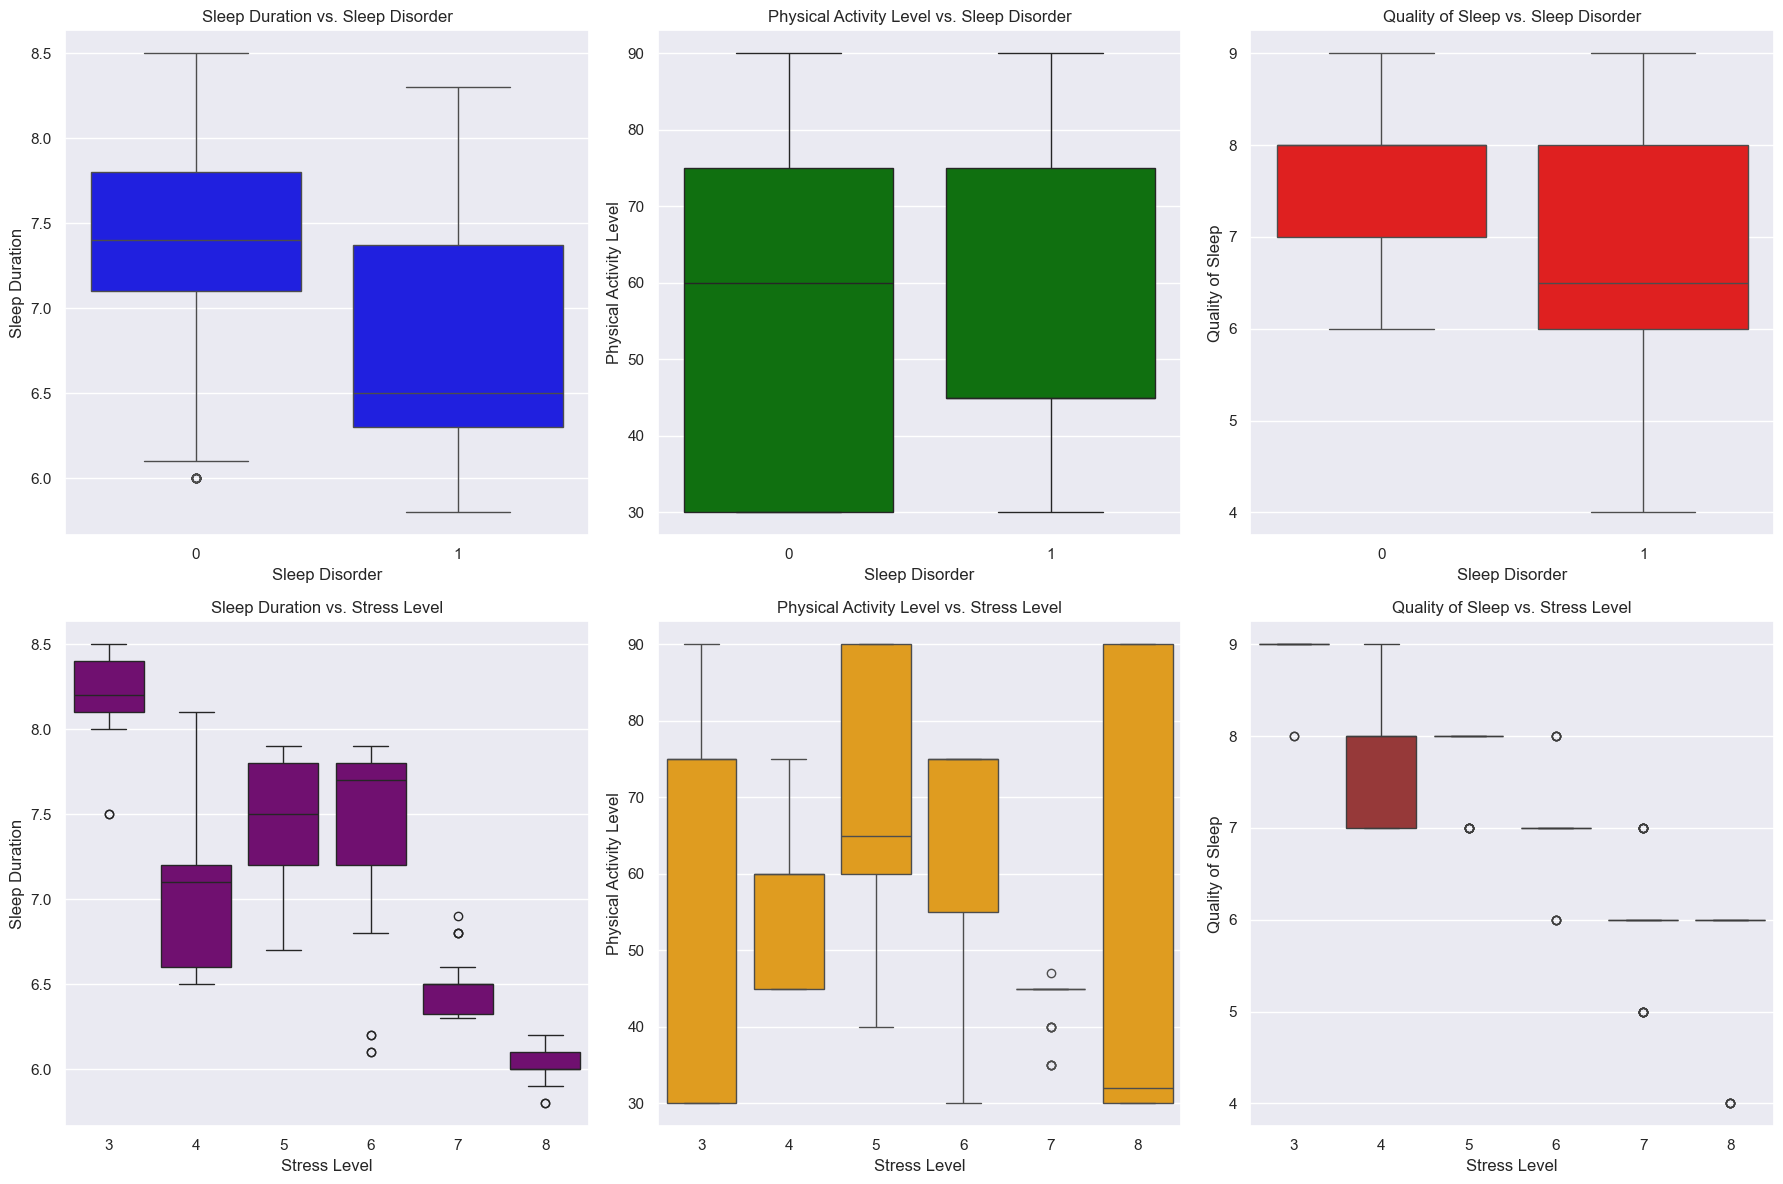

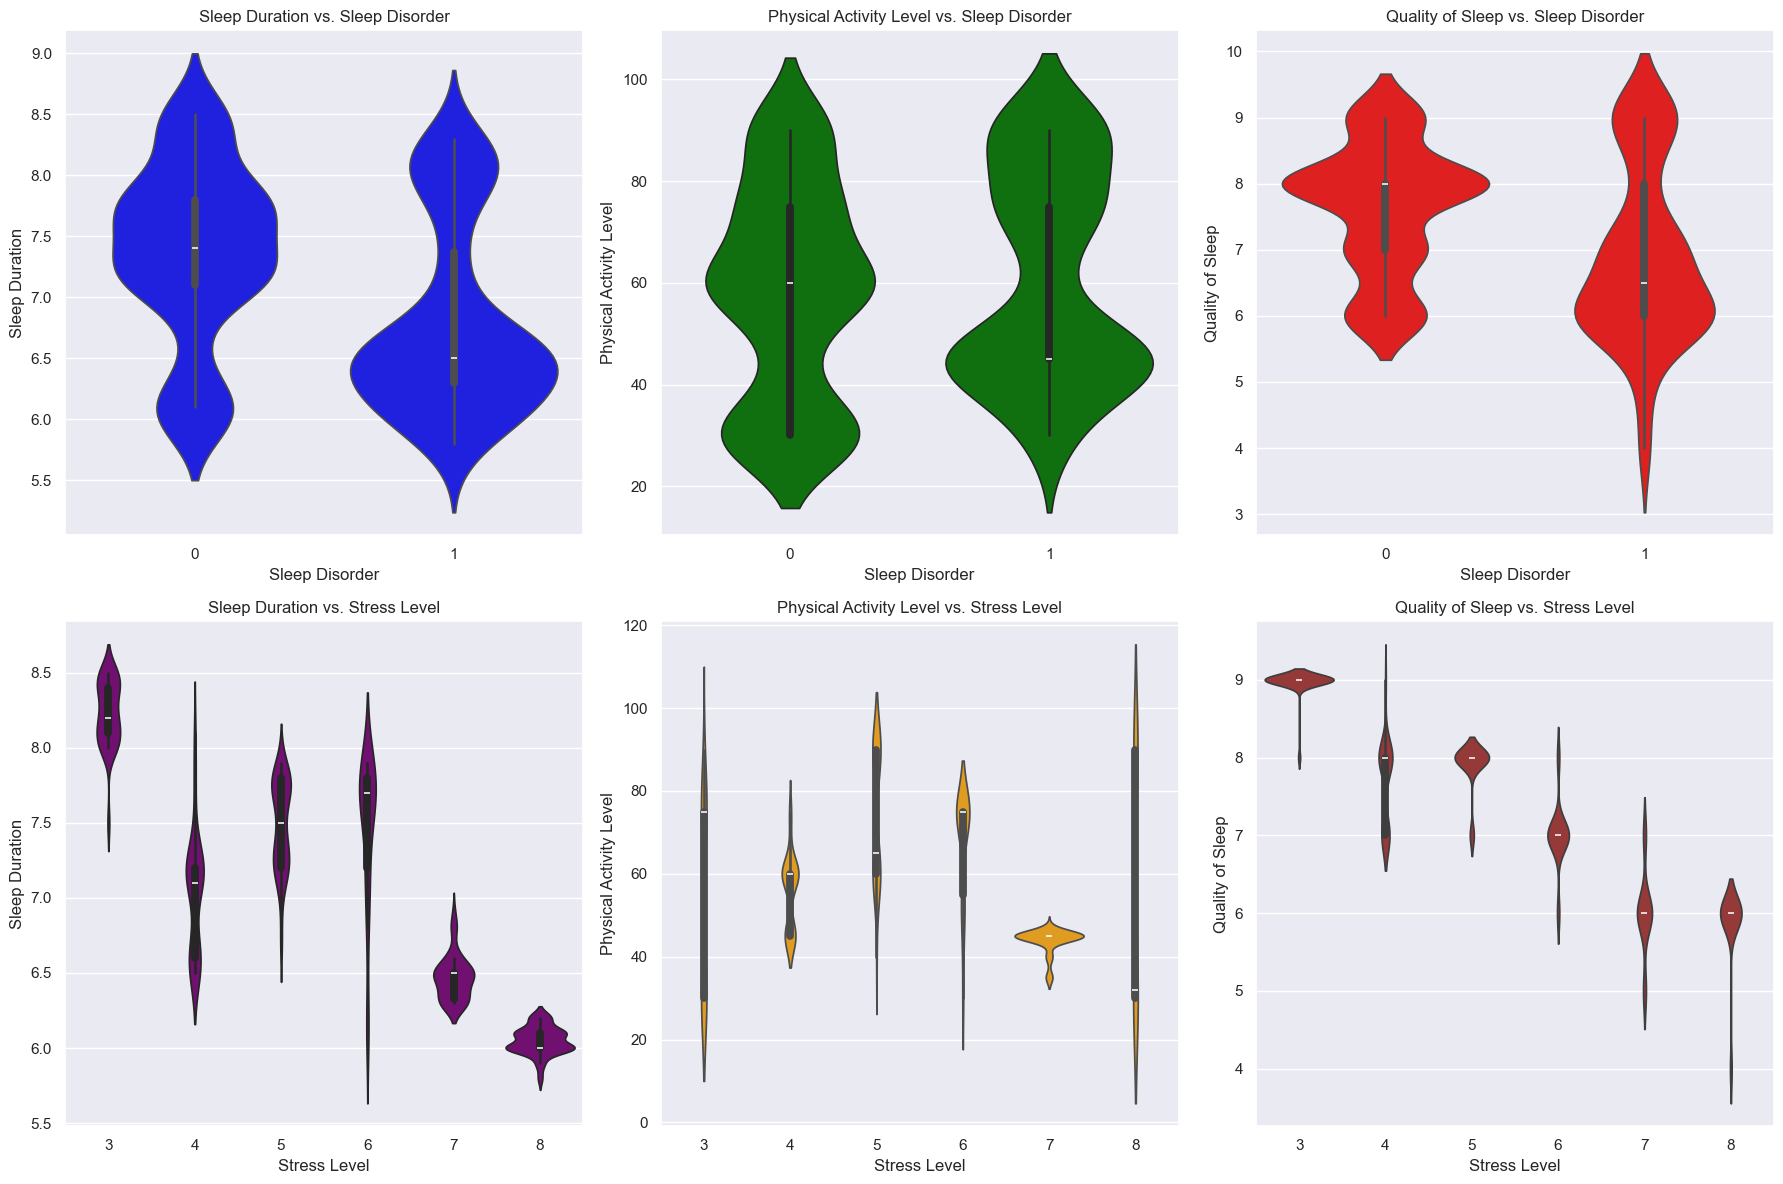

In [483]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers for each column
clean_data = remove_outliers(sleepData, "Sleep Duration")
clean_data = remove_outliers(clean_data, "Quality of Sleep")
clean_data = remove_outliers(clean_data, "Physical Activity Level")
clean_data = remove_outliers(clean_data, "Stress Level")

# Recreating the plots without outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting the graphs related to sleep without outliers
sb.boxplot(data=clean_data, y="Sleep Duration", x="Sleep Disorder", ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Sleep Duration vs. Sleep Disorder")

sb.boxplot(data=clean_data, y="Physical Activity Level", x="Sleep Disorder", ax=axes[0, 1], color="green")
axes[0, 1].set_title("Physical Activity Level vs. Sleep Disorder")

sb.boxplot(data=clean_data, y="Quality of Sleep", x="Sleep Disorder", ax=axes[0, 2], color="red")
axes[0, 2].set_title("Quality of Sleep vs. Sleep Disorder")

# Plotting graphs related to stress
sb.boxplot(data=clean_data, y="Sleep Duration", x="Stress Level", ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Sleep Duration vs. Stress Level")

sb.boxplot(data=clean_data, y="Physical Activity Level", x="Stress Level", ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Physical Activity Level vs. Stress Level")

sb.boxplot(data=clean_data, y="Quality of Sleep", x="Stress Level", ax=axes[1, 2], color="brown")
axes[1, 2].set_title("Quality of Sleep vs. Stress Level")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting the graphs related to sleep without outliers
sb.violinplot(data=clean_data, y="Sleep Duration", x="Sleep Disorder", ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Sleep Duration vs. Sleep Disorder")

sb.violinplot(data=clean_data, y="Physical Activity Level", x="Sleep Disorder", ax=axes[0, 1], color="green")
axes[0, 1].set_title("Physical Activity Level vs. Sleep Disorder")

sb.violinplot(data=clean_data, y="Quality of Sleep", x="Sleep Disorder", ax=axes[0, 2], color="red")
axes[0, 2].set_title("Quality of Sleep vs. Sleep Disorder")

# Plotting graphs related to stress
sb.violinplot(data=clean_data, y="Sleep Duration", x="Stress Level", ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Sleep Duration vs. Stress Level")

sb.violinplot(data=clean_data, y="Physical Activity Level", x="Stress Level", ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Physical Activity Level vs. Stress Level")

sb.violinplot(data=clean_data, y="Quality of Sleep", x="Stress Level", ax=axes[1, 2], color="brown")
axes[1, 2].set_title("Quality of Sleep vs. Stress Level")

plt.tight_layout()
plt.show()